# Introduction
Parse wikipedia using beautifulsoap 

### Imports
Import libraries and write settings here.

In [1]:
import requests
from bs4 import BeautifulSoup
#import urllib2
import urllib.request as urllib2
import re

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

In [99]:
1+1

2

### Data preprocessing and cleaning
Get links from the website using BeautifulSoup

In [2]:
def getHTMLContent(link):
    '''function that can parse the website'''
    html = urllib2.urlopen(link)
    soup = BeautifulSoup(html, 'html.parser')
    return soup

html_page = "https://en.wikipedia.org/wiki/Category:American_male_film_actors"

soap = getHTMLContent(html_page)

In [12]:
result_parse = soap.body.find('div', attrs={'style':'text-align:center'}).findAll('a')

links = [] # get all the actress' link from the website

for link in result_parse:
    links.append(link.get('href'))

In [13]:
#links=links[10:]
links

['//en.wikipedia.org/wiki/Category:American_male_film_actors?from=9',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Aa',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Ae',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Aj',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Ao',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=At',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Ba',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Be',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Bj',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Bo',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Bt',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Ca',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Ce',
 '//en.wikipedia.org/wiki/Category:American_male_film_actors?from=Cj',
 '//en.

In [14]:
"https:"+links[0]

'https://en.wikipedia.org/wiki/Category:American_male_film_actors?from=9'

In [28]:
# get links for all actors' name
link_name = [] # get all the actress' link from the website

for url in links:
    get_page = getHTMLContent("https:"+ url)
    page = get_page.find('div', {'class': 'mw-category'}).findAll('a')
    
    for link in page:
        link_name.append(link.get('href'))

In [29]:
len(link_name)

24446

In [31]:
# save links to a csv file
df_links = pd.DataFrame(link_name, columns = ['link']);
df_links.to_csv ('export_links_actors.csv', header=True)

In [79]:
df_links.head()

,link
0,/wiki/50_Cent
1,/wiki/Lee_Aaker
2,/wiki/Willie_Aames
3,/wiki/Quinton_Aaron
4,/wiki/Victor_Aaron


#### get information from the links


In [80]:
##### parse text data from wiki #####
name1 = []
bday1 = []
education1 = []
spouse1 = []
child1 =[] 
birthplace1 = []
role1=[]
bday1_spouse = []
birthplace1_spouse = []
role1_spouse = []
spouse1_spouse = []
child1_spouse = []

for url in df_links['link']:

    get_page = getHTMLContent('https://en.wikipedia.org' + url)
    table = get_page.find('table', {'class': 'infobox biography vcard'})
    try:
        name = table.find("div", { "class" : "fn" }).text
        name1.append(name)       
    except:
        name1.append(None)
    try:
        bday = table.find("span", { "class" : "bday" }).text
        bday1.append(bday)
    except:
        bday1.append(None)
    try:
        education = table.find("th", text="Education").find_next_sibling("td").text
        education1.append(education)
    except:
        education1.append(None)
    try:
        spouse = table.find("span", { "class" : "nowrap"}).findNext('td').get_text(separator=" ")
        spouse1.append(spouse)
    except:
        spouse1.append(None)
    try:
        child = table.find("th", text="Children").find_next_sibling("td").text
        child1.append(child)
    except:
        child1.append(None)
    try:
        birthplace = table.find("div", { "class" : "birthplace" }).text
        birthplace1.append(birthplace)
    except:
        birthplace1.append(None)
    try:
        role = table.find("td", { "class" : "role" }).text
        role1.append(role)
    except:
        role1.append(None)
    
    # first spouse information
    
    try:
        spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
        spouse_link = [link.get('href') for link in spouse_1]
        get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
        table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
        
        bday_spouse = table_spouse.find("span", { "class" : "bday" }).text
        bday1_spouse.append(bday_spouse)
        
    except:
        bday1_spouse.append(None)
        
    try:
        spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
        spouse_link = [link.get('href') for link in spouse_1]
        get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
        table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
        
        birthplace_spouse = table_spouse.find("div", { "class" : "birthplace" }).text
        birthplace1_spouse.append(birthplace_spouse)
    except:
        birthplace1_spouse.append(None)
    try:
        spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
        spouse_link = [link.get('href') for link in spouse_1]
        get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
        table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
        
        role_spouse = table_spouse.find("td", { "class" : "role" }).text
        role1_spouse.append(role_spouse)
    except:
        role1_spouse.append(None) 
    try:
        spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
        spouse_link = [link.get('href') for link in spouse_1]
        get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
        table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
        
        spouse_spouse = table_spouse.find("span", { "class" : "nowrap"}).findNext('td').get_text(separator=" ")
        spouse1_spouse.append(spouse_spouse)
    except:
        spouse1_spouse.append(None) 
    try:
        spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
        spouse_link = [link.get('href') for link in spouse_1]
        get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
        table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
        
        child_spouse = table_spouse.find("th", text="Children").find_next_sibling("td").text
        child1_spouse.append(child_spouse)
    except:
        child1_spouse.append(None) 

In [94]:
# convert to pandas dataformat
df = pd.DataFrame({'name_m': name1, 'bday_m':bday1, 'spouse_m':spouse1, 'child_m':child1,\
                   'education_m':education1,'role_m':role1,\
                   'birthplace_m':birthplace1,\
                  'bday_m_sp':bday1_spouse, 'birthplace_m_sp': birthplace1_spouse, 'role_m_sp':role1_spouse,\
                  'spouse_m_sp':spouse1_spouse, 'child_m_sp':child1_spouse})

df.fillna(value=pd.np.nan, inplace=True); # replace None to nan

In [95]:
# clean nan data and reset index
df = df.dropna(axis=0, how='all').reset_index(drop=True);
df

,name_m,bday_m,spouse_m,child_m,education_m,role_m,birthplace_m,bday_m_sp,birthplace_m_sp,role_m_sp,spouse_m_sp,child_m_sp
0,50 Cent,1975-07-06,\n G-Unit \n Dr. Dre \n Eminem \n The Game \n ...,2,NaN,\nRapper\nsinger\nsongwriter\nactor\nentrepren...,"New York City, New York, U.S.",NaN,NaN,NaN,NaN,NaN
1,Lee Aaker,1943-09-25,Sharon Ann Hamilton (1969-71) (divorced),NaN,NaN,"Actor, producer, carpenter, ski instructor","Los Angeles, California, U.S.",NaN,NaN,NaN,NaN,NaN
2,Willie Aames,1960-07-15,Vicki Weatherman ( m. 1979–1984) Maylo McCasl...,2,NaN,"Actor, director, television producer, screenwr...","Newport Beach, California, U.S.",NaN,NaN,NaN,NaN,NaN
3,Quinton Aaron,1984-08-15,NaN,NaN,NaN,Actor,"The Bronx, New York, U.S.",NaN,NaN,NaN,NaN,NaN
4,Victor Aaron,1956-09-11,Eduvina Matta (m. 1974–1984) divorced,2,NaN,"Actor, voice actor","Odessa, Texas, U.S.",NaN,NaN,NaN,NaN,NaN
5,Bruce Abbott,1954-07-28,Linda Hamilton ( m. 1982; div. 1989) Kathle...,2,NaN,Actor,"Portland, Oregon, U.S.",1956-09-26,"Salisbury, Maryland, U.S.",Actress,\n Bruce Abbott ( m. 1982; div. 1989) \n Ja...,2
6,Bud Abbott,NaN,Betty Smith ( m. 1918),2,NaN,"Actor, comedian, producer","Asbury Park, New Jersey, U.S.",NaN,NaN,NaN,NaN,NaN
7,Christopher Abbott,1986-02-01,NaN,NaN,HB Studio,Actor,"Greenwich, Connecticut, U.S.",NaN,NaN,NaN,NaN,NaN
8,Philip Abbott,NaN,Jane Dufrayne ( m. 1950–1998),NaN,NaN,Actor,"Lincoln, Nebraska, U.S.",NaN,NaN,NaN,NaN,NaN
9,Richard Abbott,1899-05-22,NaN,NaN,NaN,Actor,"Antwerp, Belgium",NaN,NaN,NaN,NaN,NaN


In [100]:
# save links to a csv file
df.to_csv ('export_df_actor.csv', header=True)

In [1071]:
df = pd.read_csv('export_df_actor.csv')

In [97]:
# count missing data
df.isnull().sum()
print("total number of actors : {}".format(len(df)) )

name_m                 8
bday_m              2348
spouse_m           10982
child_m            14930
education_m        19604
role_m              2097
birthplace_m         995
bday_m_sp          19676
birthplace_m_sp    19624
role_m_sp          19726
spouse_m_sp        19604
child_m_sp         20039
age_m_diff         19706
age_m               2348
age_m_spouse       19676
dtype: int64

total number of actors : 21168


In [96]:
# Calculate the ages
from time import gmtime, strftime
time_now = pd.to_datetime(strftime("%Y-%m-%d", gmtime()))
df['bday_m'] = pd.to_datetime(df['bday_m']);
df['bday_m_sp'] = pd.to_datetime(df['bday_m_sp']);

df['age_m_diff'] = (df['bday_m']-df['bday_m_sp'])/np.timedelta64(1,'Y')
df['age_m']= (time_now - df['bday_m'])/np.timedelta64(1,'Y')
df['age_m_spouse']= (time_now - df['bday_m_sp'])/np.timedelta64(1,'Y')

In [1067]:
#clean child column  (strange result, ????)
for i in range(len(df['child'])):
    if len(str(df['child'][i])) == 1:
        df['child'][i] = float(df['child'][i])
    else:
        df['child'][i] = None

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1069]:
df.fillna(value=pd.np.nan, inplace=True); # replace None to nan

In [1073]:
df.head()

,Unnamed: 0,name,bday,spouse,child,education,role,birthplace,bday_sp,birthplace_sp,role_sp,age_diff,age_actress,age_spouse
0,0,Beverly Aadland,1942-09-16,Maurice Jose de Leon ( m. 1961 ; div. 196...,1,NaN,Actress,"Hollywood, California, U.S.",NaN,NaN,NaN,NaN,76.549142,NaN
1,1,Caroline Aaron,1952-08-07,James Foreman ( m. 1981),2,NaN,"Actress, film producer","Richmond, Virginia, U.S.",NaN,NaN,NaN,NaN,66.657084,NaN
2,2,Diahnne Abbott,1945-05-01,Robert De Niro ( m. 1976; div. 1988),"2, including Drena De Niro",NaN,"Actress, singer","New York City, NY, US",1943-08-17,"Manhattan, New York City, U.S.","Actor, producer, director",1.705716,73.926227,75.631943
3,3,Rose Abdoo,1962-11-28,NaN,NaN,NaN,"Actress, comedian","Chicago, Illinois, U.S.",NaN,NaN,NaN,NaN,56.348864,NaN
4,4,Donzaleigh Abernathy,1957-08-05,NaN,NaN,NaN,"Actress, author, civil rights activist","Montgomery, Alabama, U.S.",NaN,NaN,NaN,NaN,61.663142,NaN


In [91]:
df.describe()

,age_diff,age_actress,age_spouse
count,1462.000000,18820.000000,1492.000000
mean,-2.848822,74.247487,68.893730
std,6.285731,32.750565,27.052925
min,-30.418147,12.561517,25.284571
25%,-6.524432,47.678597,46.103616
50%,-2.225918,68.121864,63.972566
75%,1.130756,98.323032,86.547978
max,17.016092,175.653162,144.939321


In [92]:
df['age_actress'].hist(bins=20)

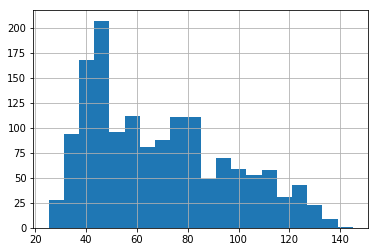

In [93]:
df['age_spouse'].hist(bins=20)

In [1039]:
df.sort_values(by='age_diff', ascending=False)

,name,bday,spouse,child,education,role,birthplace,bday_sp,birthplace_sp,role_sp,age_diff,age_actress,age_spouse
444,Bo Derek,1956-11-20,John Derek ( m. 1976; died 1998),NaN,NaN,Actress,"Long Beach, California, U.S.",1926-08-12,"Hollywood, California, U.S.","Actor, director, photographer",30.275776,62.369522,92.645297
1888,Pia Zadora,1953-05-04,Meshulam Riklis ( m. 1977; div. 1993) Jonat...,3,NaN,"Actress, singer","Hoboken, New Jersey, U.S.",1923-12-02,"Istanbul, Turkey",Businessman,29.421549,65.917849,95.339398
563,Mia Farrow,1945-02-09,"Actress, activist, model",See Farrow children,NaN,"Actress, activist, model","Los Angeles, California, U.S.",1915-12-12,"Hoboken, New Jersey, U.S.",\nSinger\nactor\nproducer\n,29.164185,74.147998,103.312183
816,Hedda Hopper,1885-05-02,DeWolf Hopper ( m. 1913; divorce 1922),William Hopper,NaN,"Actress, gossip columnist","Hollidaysburg, Pennsylvania, U.S.",1858-03-30,"New York City, U.S.","Actor, comedian, singer",27.091590,133.921983,161.013573
77,Lauren Bacall,1924-09-16,Humphrey Bogart ( m. 1945; died 1957) Jason R...,"3, including Sam Robards",NaN,\nActress\nmodel\n,"The Bronx, New York City, U.S.",1899-12-25,"New York City, U.S.",Actor,24.726038,94.548143,119.274181
399,Linda Darnell,1923-10-16,Peverell Marley ( m. 1943; div. 1951) Phill...,1,NaN,"Actress, singer","Dallas, Texas, U.S.",1899-08-14,"San Jose, California",Cinematographer,24.170243,95.468079,119.638322
322,Claudia Christian,1965-08-10,Gary DeVore ( m. 1988; div. 1992),NaN,NaN,"Actress, singer","Glendale, California, U.S.",1941-09-17,NaN,Screenwriter,23.896452,53.649288,77.545740
771,Amber Heard,1986-04-22,Johnny Depp ( m. 2015; div. 2017),NaN,NaN,Actress,"Austin, Texas, U.S.",1963-06-09,"Owensboro, Kentucky, U.S.",Actorproducermusician,22.869737,32.950711,55.820448
1186,Alley Mills,1951-05-09,Orson Bean ( m. 1993),NaN,NaN,Actress,"Chicago, Illinois, United States",1928-07-22,"Burlington, Vermont, United States","Actor, comedian, writer, producer",22.795814,67.905570,90.701383
1827,Lynn Whitfield,1953-05-06,Vantile Whitfield ( m. 1974–1978) Brian Gibs...,1,NaN,Actress,"Baton Rouge, Louisiana, U.S.",1930-09-08,"Washington, D.C., US[1]","Arts administrator, director, playwright, educ...",22.658918,65.912373,88.571292


In [1041]:
type(df['child'][1])

str

In [49]:
def spouse():
    '''parse spouse information'''
    spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
    spouse_link = [link.get('href') for link in spouse_1]
    get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
    table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
    return table_spouse

In [53]:
url = '/wiki/Frank_K._Wheaton'
#url = '/wiki/Whitney_Able'

get_page = getHTMLContent('https://en.wikipedia.org' + url)
table = get_page.find('table', {'class': 'infobox biography vcard'})
name = table.find("div", { "class" : "fn" }).text
print(name)

#bday = table.find("span", { "class" : "bday" }).text
#print(bday)
#education = table.find("th", text="Education").find_next_sibling("td").get_text(separator=" ")
#print(education)
spouse = table.find("span", { "class" : "nowrap"}).findNext('td').get_text(separator=" ")
print(spouse)
#child = table.find("th", text="Children").find_next_sibling("td").text
#print(child)

birthplace = table.find("div", { "class" : "birthplace" }).text
print(birthplace)

role = table.find("td", { "class" : "role" }).get_text(separator=" ")
print(role)

spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')
spouse_link = [link.get('href') for link in spouse_1]
get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
  
bday_spouse = table_spouse.find("span", { "class" : "bday" }).text
print(bday_spouse)
birthplace_spouse = table_spouse.find("div", { "class" : "birthplace" }).text
print(birthplace_spouse)
role_spouse = table_spouse.find("td", { "class" : "role" }).get_text(separator=" ")
print(role_spouse)

#table_spouse = spouse(table1)
#spouse_1 = table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).findAll('a')#.get('href')

#spouse_link = [link.get('href') for link in spouse_1]

#print(spouse_link)
#get_spouse_link = getHTMLContent('https://en.wikipedia.org' + spouse_link[0])
#table_spouse = get_spouse_link.find('table', {'class': 'infobox biography vcard'})
###
#bday_spouse = spouse(table2).find("span", { "class" : "bday" }).text

#print(bday_spouse)
#birthplace_spouse = spouse(table1).find("div", { "class" : "birthplace" }).text
#print(birthplace_spouse)

#role_spouse = spouse(table1).find("td", { "class" : "role" }).text
#print(role_spouse)

#print(table.find("span", {"class":"nowrap"}).findAll( string="Spouse(s)").findNext('td')) #.findAll( text="Spouse(s)")
#spouse_1 = spouse_0.findNext('div')
#year_1m = spouse_1.findNext('span')
#year_1d = year_1m.findNext('span')

#spouse_2 = spouse_1.findNext('div')
#year_2m = spouse_2.findNext('span')
#year_2d = year_2m.findNext('span')

#spouse_3 = spouse_2.findNext('div')
#year_3m = spouse_3.findNext('abbr')
#year_3d = year_3m.findNext('span')

#spouse_4 = spouse_3.findNext('div')

#name = table.find("div", { "class" : "fn" }).text
#bday = table.find("span", { "class" : "bday" }).text
#Occupation
#print(spouse_0)
#print(spouse_1.text)
#print(year_1m.text)
#print(year_1d.text)
#print(spouse_2.text)
#print(year_2m.text)
#print(year_2d.text)
#print(spouse_3.text)
#print(spouse_4.text)
#print(year_3m.text)
#print(year_3d.text)
#print(bday)

Frank K. Wheaton
Jean Carn  (divorced), Robin Green (divorced), Jennifer Jones
Los Angeles, California, U.S.


AttributeError: 'NoneType' object has no attribute 'get_text'

In [536]:
#words = spouse_0.split()
# remove punctuation from each word
import string
#result = spouse_0.translate(str.maketrans(",", string.punctuation))
#print(result)
#for line in spouse_0.split():
#    print(line)
#table = str.maketrans(" " ," " , string.punctuation)
#stripped = [w.translate(table) for w in spouse_0.split()]
stripped = [w for w in spouse_0.split()]

print(stripped)
#stripped.index('(')


indices1 = [i for i, x in enumerate(stripped) if x == "("]
indices1
indices_m = [i for i, x in enumerate(stripped) if x == "m."]
indices_m

indices2 = [i for i, x in enumerate(stripped) if x == ")"]
indices2
indices_div = [i for i, x in enumerate(stripped) if x == "div."]
indices_div

indices_

print(" ".join(stripped[0:indices1[0]]))
print(stripped[indices_m[0]+1])
print(stripped[indices_div[0]+1])
print(" ".join(stripped[indices2[0]+1:indices1[1]]))
print(stripped[indices_m[1]+1])
print(stripped[indices_div[1]+1])
print(" ".join(stripped[indices2[1]+1:indices1[2]]))
print(stripped[indices_m[2]+1])
#print(stripped[indices_div[1]+1])
#names_a =[]
#for i in stripped[0:4]:
    #print(i)
#    if i!='m' or i!='div':
        #names_a.append(i)
#        print("".join(i))
#    else:
#        pass
#print(names_a)

['Maurice', 'Jose', 'de', 'Leon', '(', 'm.', '1961', ';', 'div.', '1964', ')', 'Joseph', 'E.', 'McDonald', '(', 'm.', '1967', ';', 'div.', '1969', ')', 'Ronald', 'Fisher', '(', 'm.', '1969)']


[4, 14, 23]

[5, 15, 24]

[10, 20]

[8, 18]

Maurice Jose de Leon
1961
1964
Joseph E. McDonald
1967
1969
Ronald Fisher
1969)


In [526]:
name_1=[]
for i in stripped:
    #if i !='m':
    name_1.append(i)
print(name_1)

['Maurice', 'Jose', 'de', 'Leon', '(', 'm.', '1961', ';', 'div.', '1964', ')', 'Joseph', 'E.', 'McDonald', '(', 'm.', '1967', ';', 'div.', '1969', ')', 'Ronald', 'Fisher', '(', 'm.', '1969)']


In [548]:
df

,name,bday,spouse,child,education,role,birthplace
0,Christina Aguilera,1980-12-18,"Los Angeles , California , U.S.",2,None,Singersongwriteractresstelevision personality,"New York City, New York, U.S."
1,Lexi Ainsworth,1992-10-28,None,None,None,Actress,"Oklahoma City, Oklahoma, U.S."
2,Jessica Alba,1981-04-28,"Los Angeles, California , U.S.",3,None,"Actress, businesswoman","Pomona, California, U.S."
3,Lola Albright,1924-07-20,Warren Dean ( m. 1944; div. 1949) Jack Cars...,None,None,"Actress, singer, model","Akron, Ohio, U.S."
4,Erika Alexander,1969-11-19,Tony Puryear ( m. 1997; div. 2017),None,Philadelphia High School for Girls,Actress,"Winslow, Arizona, U.S."
5,Jaimie Alexander,1984-03-12,None,None,None,Actress,"Greenville, South Carolina, U.S."
6,None,None,None,None,None,None,None
7,Khandi Alexander,1957-09-04,None,None,None,"Actress, dancer, choreographer","Jacksonville, Florida, U.S."
8,None,1973-05-17,None,2,None,Actress,None
9,Tatyana Ali,1979-01-24,Harvard University (2002),1,None,"Actress, singer","North Bellmore, Long Island, New York, U.S."


In [3]:
import requests

In [312]:
url = 'https://en.wikipedia.org/wiki/Ren%C3%A9e_Zellweger'
#url = 'https://en.wikipedia.org/wiki/Madeline_Zima'

In [313]:
#def infobox() :
#raw = requests.get(url).text
#soup = BeautifulSoup(raw)

#html = urllib2.urlopen(url)
#soup = BeautifulSoup(html, 'html.parser')
soup = getHTMLContent(url)    
#print(soup.prettify())
table = soup.find('table',{'class':'infobox biography vcard'})
#print(table)
#print(table.findAll('tr'))
#for tr in table.find_all('tr'):
#           tr.get('class')
            #if (tr.get('class') == ['fn'] ):
            #    link = tr.find('a')
            #    print(link)
#print(table.find(''))
#print(table.findAll(True) )
#for tr in table.findAll(True) :
#        print(tr.text)
#allTags = table.findAll(True)
#[tag.name for tag in allTags]
#print(table.get_text().strip())
print(table.find("div", { "class" : "fn" }).text.strip())
#print(table.find("th", { "scope" : "row" }).text)
print(table.find("span", { "class" : "bday" }).text.strip() )
print(table.find("div", { "class" : "birthplace" }).text)
print(table.find("td", { "class" : "role" }).text.strip())
#print(table.find("th", { "scope" : "row" }).text)
print(table.find("div", { "style" : "display:inline-block;line-height:normal;margin:2px 0px;"}).text.strip() )

print(table.find("th", text="Years&nbsp;active"))#.find_next_sibling("td").text)
print(table.find("th", text="Education").find_next_sibling("td").text)
#print(table.find("th", text="Children").find_next_sibling("td").text)

#print(table('tr', limit=2)[1])
#saved_rowspans = []
#for row in table.findAll("tr"):
#    cells = row.findAll(["th", "td"])

#    if len(saved_rowspans) == 0:
#        saved_rowspans = [None for _ in cells]
#print(saved_rowspans)    
#table = soup.find('table', class_='infobox vcard')
#result = {}
#exceptional_row_count = 0
#for tr in table.find_all('tr'):
#    if tr.find('th'):
#        result[tr.find('th').text] = tr.find('td').text
#    else:
        # the first row Logos fall here
#        exceptional_row_count += 1
#if exceptional_row_count > 1:
#    print('WARNING ExceptionalRow>1: ', table)
#print(result)

Renée Zellweger
1969-04-25
Katy, Texas, U.S.
Actress
film producer
Kenny Chesney(m. 2005; annulled 2005)
None
University of Texas at Austin


In [71]:
website_url = requests.get(url).text

In [65]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Renée Zellweger - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Renée_Zellweger","wgTitle":"Renée Zellweger","wgCurRevisionId":888919731,"wgRevisionId":888919731,"wgArticleId":204352,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: Extra text: authors list","Webarchive template wayback links","Articles with short description","Articles with hCards","Commons category link is on Wikidata","Wikipedia articles with BNE identifiers","Wikipedia articles with BNF identifiers","Wikipedia articles with GND identifiers",

In [14]:
My_table = soup.find('table',{'class':'wikitable sortable'})
My_table 

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>Area (km²)
</th>
<th class="unsortable">Notes
</th></tr>
<tr>
<td>1
</td>
<td><span class="flagicon" style="display:inline-block;width:25px;"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/23px-Flag_of_Russia.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/35px-Flag_of_Russia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/45px-Flag_of_Russia.svg.png 2x" width="23"/></span> <a href="/wiki/Russia" title="Russia">Russia</a>*
</td>
<td>13,100,000
</td>
<td>17,125,200 including European part
</td></tr>
<tr>
<td>2
</td>
<td><span class="flagicon" style="display:inline-block;width:25px;"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.

In [18]:
links = My_table.findAll('a') 
links

[<a href="/wiki/Russia" title="Russia">Russia</a>,
 <a href="/wiki/China" title="China">China</a>,
 <a href="/wiki/Hong_Kong" title="Hong Kong">Hong Kong</a>,
 <a href="/wiki/Macau" title="Macau">Macau</a>,
 <a href="/wiki/India" title="India">India</a>,
 <a href="/wiki/Kazakhstan" title="Kazakhstan">Kazakhstan</a>,
 <a href="/wiki/Saudi_Arabia" title="Saudi Arabia">Saudi Arabia</a>,
 <a href="/wiki/Iran" title="Iran">Iran</a>,
 <a href="/wiki/Mongolia" title="Mongolia">Mongolia</a>,
 <a href="/wiki/Indonesia" title="Indonesia">Indonesia</a>,
 <a href="/wiki/Pakistan" title="Pakistan">Pakistan</a>,
 <a href="/wiki/Gilgit-Baltistan" title="Gilgit-Baltistan">Gilgit-Baltistan</a>,
 <a href="/wiki/Azad_Kashmir" title="Azad Kashmir">AJK</a>,
 <a href="/wiki/Turkey" title="Turkey">Turkey</a>,
 <a href="/wiki/Myanmar" title="Myanmar">Myanmar</a>,
 <a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a>,
 <a href="/wiki/Yemen" title="Yemen">Yemen</a>,
 <a href="/wiki/Thailand" title="T

In [23]:
Countries = []
for link in links:
    Countries.append(link.get('title'))
print(Countries)

['Russia', 'China', 'Hong Kong', 'Macau', 'India', 'Kazakhstan', 'Saudi Arabia', 'Iran', 'Mongolia', 'Indonesia', 'Pakistan', 'Gilgit-Baltistan', 'Azad Kashmir', 'Turkey', 'Myanmar', 'Afghanistan', 'Yemen', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Japan', 'Vietnam', 'Malaysia', 'Oman', 'Philippines', 'Laos', 'Kyrgyzstan', 'Syria', 'Golan Heights', 'Cambodia', 'Bangladesh', 'Nepal', 'Tajikistan', 'North Korea', 'South Korea', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Georgia (country)', 'Sri Lanka', 'Egypt', 'Bhutan', 'Taiwan', 'Armenia', 'Israel', 'Kuwait', 'East Timor', 'Qatar', 'Lebanon', 'Cyprus', 'Northern Cyprus', 'State of Palestine', 'Brunei', 'Bahrain', 'Singapore', 'Maldives']


In [24]:
import pandas as pd
df = pd.DataFrame()
df['Countries'] = Countries
df

,Countries
0,Russia
1,China
2,Hong Kong
3,Macau
4,India
5,Kazakhstan
6,Saudi Arabia
7,Iran
8,Mongolia
9,Indonesia


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here